In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(8, 8)})

In [2]:
enron_ex1 = pd.read_csv("../../results/enron_exp1.csv")
enron_ex1

,accuracies,n_authors,n_samples,FE_algorithm,n_gram,FE_algorithm n-gram
0,0.933333,2,120,Word n-gram,1,Word n-gram-1
1,0.837500,2,80,Word n-gram,1,Word n-gram-1
2,0.800000,2,40,Word n-gram,1,Word n-gram-1
3,0.755000,5,120,Word n-gram,1,Word n-gram-1
4,0.757500,5,80,Word n-gram,1,Word n-gram-1
...,...,...,...,...,...,...
175,0.353750,10,80,POS n-gram,5,POS n-gram-5
176,0.235000,10,40,POS n-gram,5,POS n-gram-5
177,0.305833,20,120,POS n-gram,5,POS n-gram-5
178,0.258750,20,80,POS n-gram,5,POS n-gram-5


In [3]:
enron_ex1["label"] = enron_ex1["n_authors"].astype(str) + '-' + enron_ex1["n_samples"].astype(str)
enron_ex1

,accuracies,n_authors,n_samples,FE_algorithm,n_gram,FE_algorithm n-gram,label
0,0.933333,2,120,Word n-gram,1,Word n-gram-1,2-120
1,0.837500,2,80,Word n-gram,1,Word n-gram-1,2-80
2,0.800000,2,40,Word n-gram,1,Word n-gram-1,2-40
3,0.755000,5,120,Word n-gram,1,Word n-gram-1,5-120
4,0.757500,5,80,Word n-gram,1,Word n-gram-1,5-80
...,...,...,...,...,...,...,...
175,0.353750,10,80,POS n-gram,5,POS n-gram-5,10-80
176,0.235000,10,40,POS n-gram,5,POS n-gram-5,10-40
177,0.305833,20,120,POS n-gram,5,POS n-gram-5,20-120
178,0.258750,20,80,POS n-gram,5,POS n-gram-5,20-80


In [4]:
twitter_ex1 = pd.read_csv("../../results/twitter_exp1.csv")
twitter_ex1

,accuracies,n_authors,n_samples,FE_algorithm,n_gram,FE_algorithm_ngram
0,1.000000,2,10,Word n-gram,1,Word n-gram 1
1,1.000000,2,20,Word n-gram,1,Word n-gram 1
2,1.000000,2,30,Word n-gram,1,Word n-gram 1
3,0.980000,2,50,Word n-gram,1,Word n-gram 1
4,1.000000,2,100,Word n-gram,1,Word n-gram 1
...,...,...,...,...,...,...
5875,0.324800,50,50,POS n-gram,5,POS n-gram 5
5876,0.379200,50,100,POS n-gram,5,POS n-gram 5
5877,0.420900,50,200,POS n-gram,5,POS n-gram 5
5878,0.447867,50,300,POS n-gram,5,POS n-gram 5


# Qual o desempenho de cada técnica de extração de características isolando a quantidade de autores e de exemplares de texto? 

Tirando a media para os diferentes valores de $n$ do n-grama

Text(0.5, 0.98, 'Twitter: Impacto na quantidade de autores e exemplares na atribuição de autoria para cada técnica de extração de características')

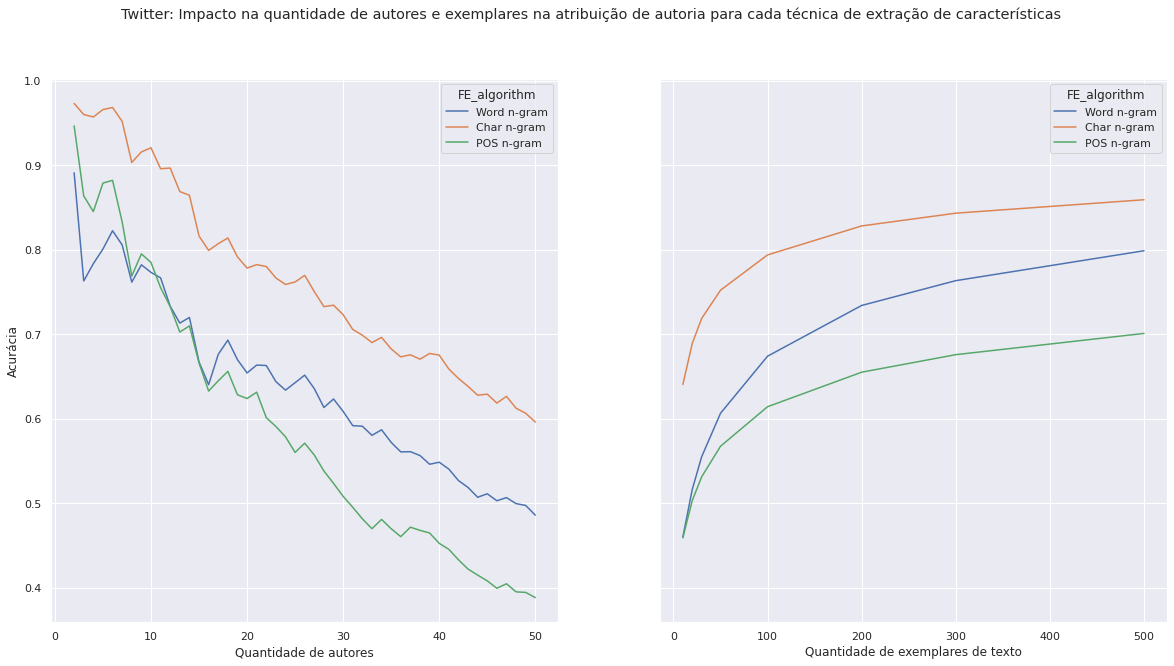

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
d1 = sns.lineplot(data=twitter_ex1, x="n_authors", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0])
d1.set_ylabel("Acurácia")
d2 = sns.lineplot(data=twitter_ex1, x="n_samples", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1])
d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de exemplares de texto")
fig.suptitle("Twitter: Impacto na quantidade de autores e exemplares na atribuição de autoria para cada técnica de extração de características")


Text(0.5, 0.98, 'Enron: Impacto na quantidade de autores e exemplares na atribuição de autoria para cada técnica de extração de características')

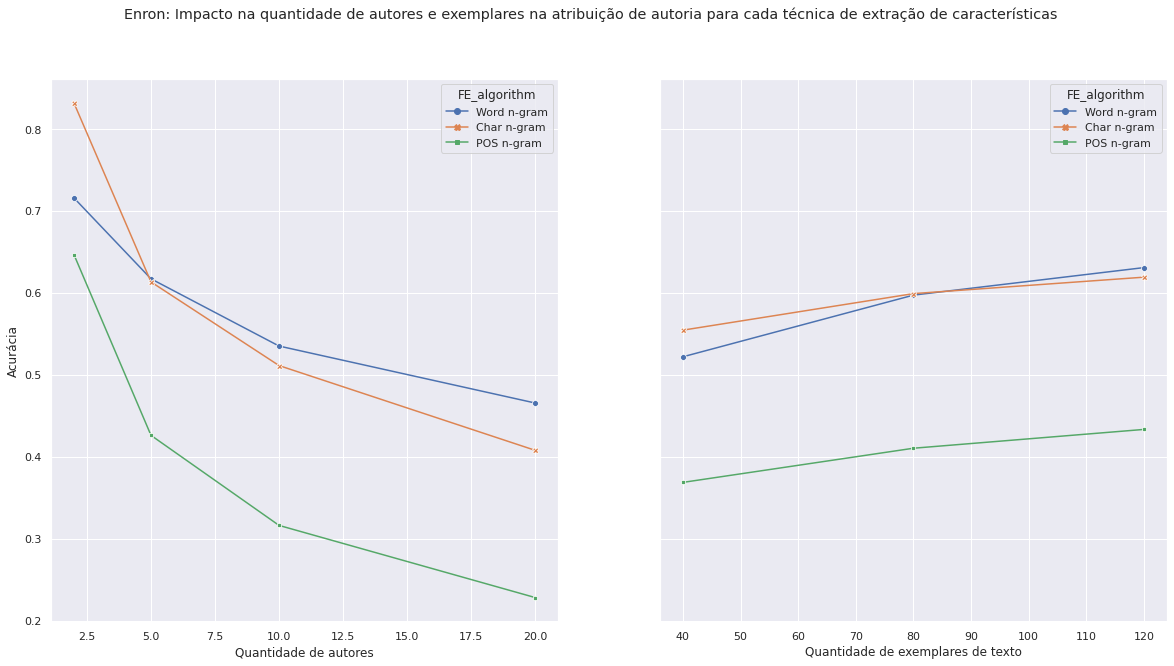

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
d1 = sns.lineplot(data=enron_ex1, x="n_authors", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0], style="FE_algorithm", markers=True, dashes=False)
d2 = sns.lineplot(data=enron_ex1, x="n_samples", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1], style="FE_algorithm", markers=True, dashes=False)
d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de exemplares de texto")
d1.set_ylabel("Acurácia")
fig.suptitle("Enron: Impacto na quantidade de autores e exemplares na atribuição de autoria para cada técnica de extração de características")


# Como diferentes valores de $n$ no ngrama influcenciam para cada técnicas de extração de características?

Text(0.5, 0.98, 'Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores')

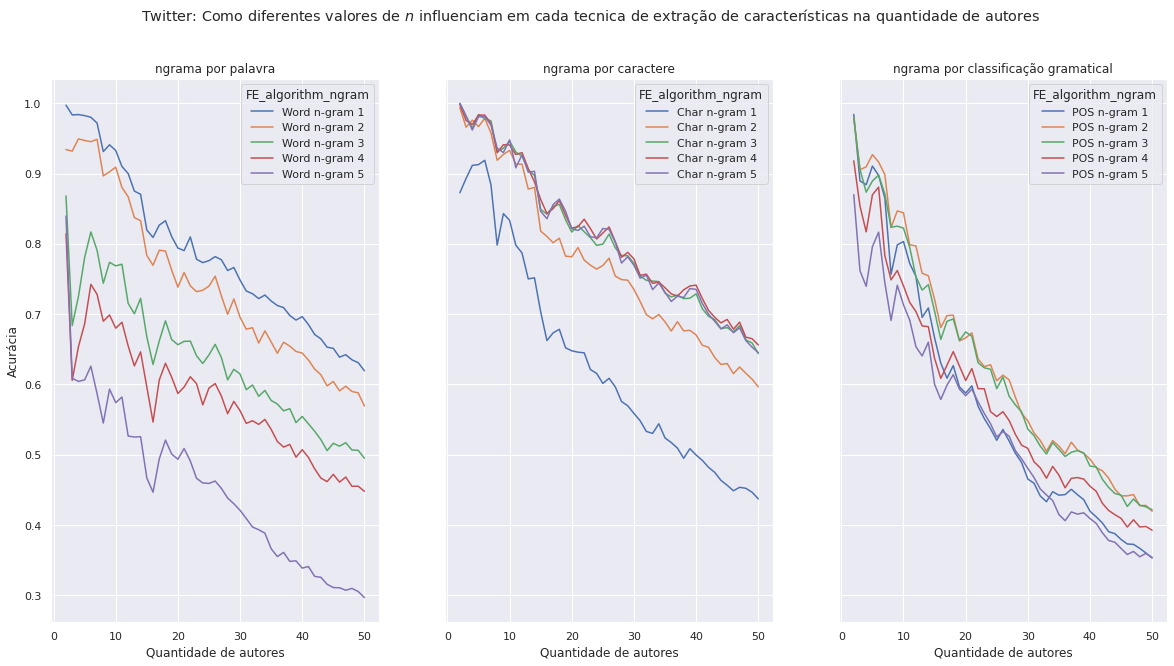

In [9]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)
d1 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "Word n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[0])
d2 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "Char n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[1])
d3 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "POS n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[2])
d1.set_title("ngrama por palavra"); d2.set_title("ngrama por caractere"); d3.set_title("ngrama por classificação gramatical")
d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de autores"); d3.set_xlabel("Quantidade de autores")
d1.set_ylabel("Acurácia")
fig.suptitle("Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores")

Text(0.5, 0.98, 'Enron: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores')

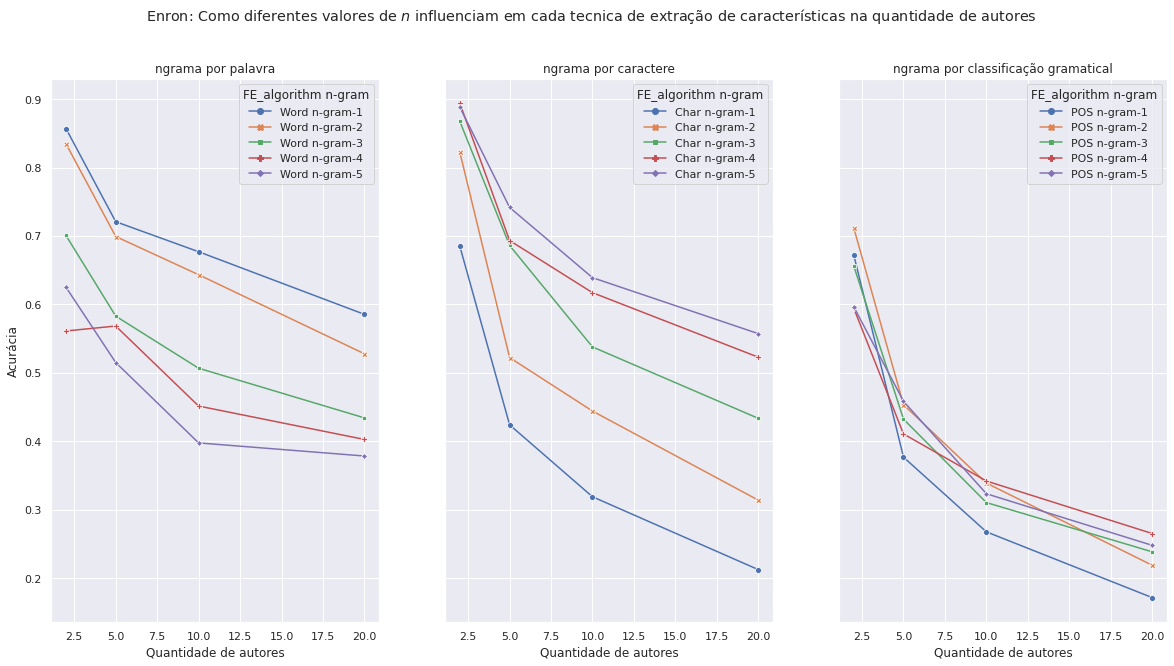

In [12]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)
d1 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "Word n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[0], style="FE_algorithm n-gram", markers=True, dashes=False)
d2 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "Char n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[1], style="FE_algorithm n-gram", markers=True, dashes=False)
d3 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "POS n-gram"], x="n_authors", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[2], style="FE_algorithm n-gram", markers=True, dashes=False)
d1.set_title("ngrama por palavra"); d2.set_title("ngrama por caractere"); d3.set_title("ngrama por classificação gramatical")
d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de autores"); d3.set_xlabel("Quantidade de autores")
d1.set_ylabel("Acurácia")
fig.suptitle("Enron: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores")

Text(0.5, 0.98, 'Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de EC na quantidade de textos')

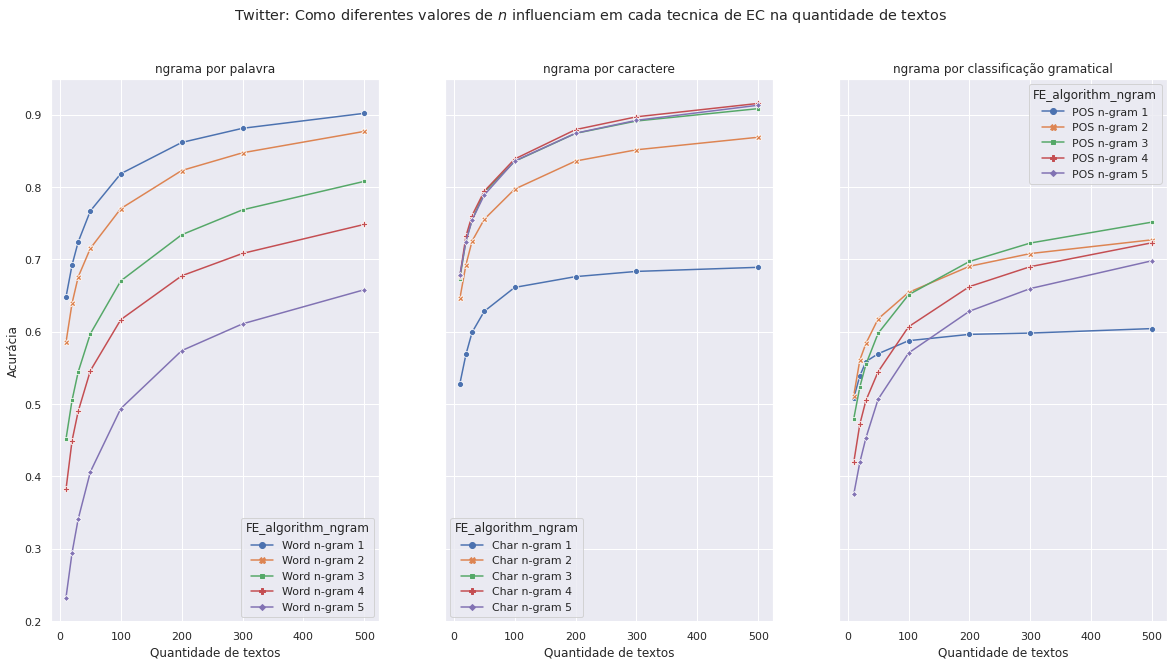

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)
d1 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "Word n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[0], style="FE_algorithm_ngram", markers=True, dashes=False)
d2 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "Char n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[1], style="FE_algorithm_ngram", markers=True, dashes=False)
d3 = sns.lineplot(data=twitter_ex1[twitter_ex1.FE_algorithm == "POS n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[2], style="FE_algorithm_ngram", markers=True, dashes=False)
d1.set_title("ngrama por palavra"); d2.set_title("ngrama por caractere"); d3.set_title("ngrama por classificação gramatical")
d1.set_xlabel("Quantidade de textos"); d2.set_xlabel("Quantidade de textos"); d3.set_xlabel("Quantidade de textos")
d1.set_ylabel("Acurácia")
fig.suptitle("Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de EC na quantidade de textos")


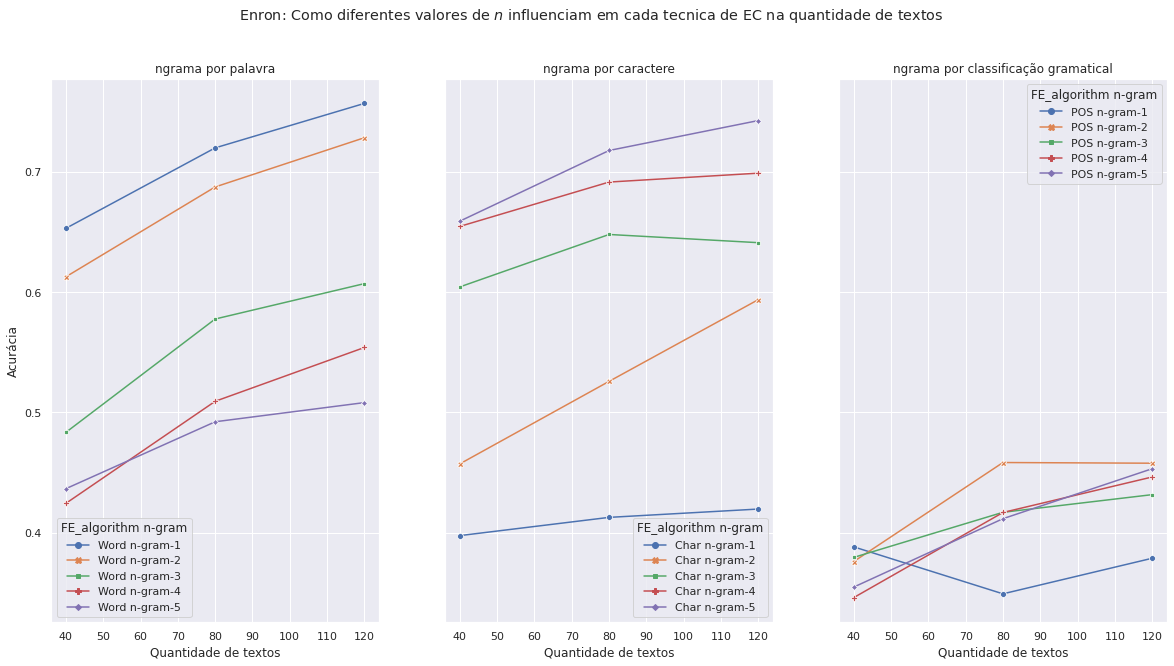

In [14]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)
d1 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "Word n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[0], style="FE_algorithm n-gram", markers=True, dashes=False)
d2 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "Char n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[1], style="FE_algorithm n-gram", markers=True, dashes=False)
d3 = sns.lineplot(data=enron_ex1[enron_ex1.FE_algorithm == "POS n-gram"], x="n_samples", y="accuracies", hue="FE_algorithm n-gram", ci=None, ax=ax[2], style="FE_algorithm n-gram", markers=True, dashes=False)
d1.set_title("ngrama por palavra"); d2.set_title("ngrama por caractere"); d3.set_title("ngrama por classificação gramatical")
d1.set_xlabel("Quantidade de textos"); d2.set_xlabel("Quantidade de textos"); d3.set_xlabel("Quantidade de textos")
d1.set_ylabel("Acurácia")
fig.suptitle("Enron: Como diferentes valores de $n$ influenciam em cada tecnica de EC na quantidade de textos");

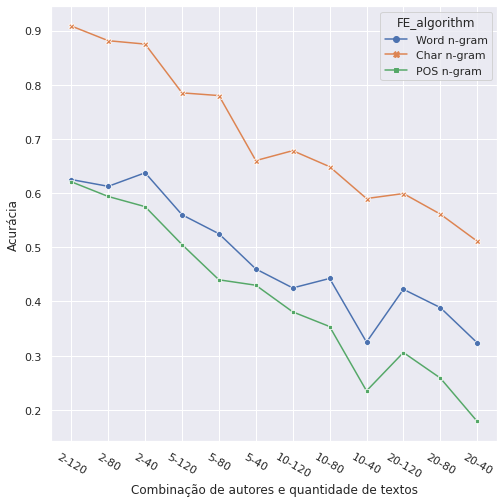

In [33]:
enron_ex1_n5 = enron_ex1[enron_ex1.n_gram == 5]
d1 = sns.lineplot(data=enron_ex1_n5, x="label", y="accuracies", ci=None, hue="FE_algorithm", style="FE_algorithm", markers=True, dashes=False)
plt.xticks(rotation=330);
d1.set_ylabel("Acurácia")
d1.set_xlabel("Combinação de autores e quantidade de textos");

# Quanto o tamanho dos documentos (em caracteres) afeta o desempenho de cada método de extração de características?

In [17]:
enron_e2 = pd.read_csv("../../results/enron_exp2-2.csv")
enron_e2["label"] = enron_e2["n_authors"].astype(str) + '-' + enron_e2["n_samples"].astype(str)
enron_e2

,accuracies,n_authors,n_samples,FE_algorithm,n_gram,doc_len,label
0,0.837500,2,120,POS n-gram,1,1-26,2-120
1,0.837500,2,80,POS n-gram,1,1-26,2-80
2,0.825000,2,40,POS n-gram,1,1-26,2-40
3,0.501667,5,120,POS n-gram,1,1-26,5-120
4,0.455000,5,80,POS n-gram,1,1-26,5-80
...,...,...,...,...,...,...,...
535,0.697500,10,80,Char n-gram,5,56-320,10-80
536,0.625000,10,40,Char n-gram,5,56-320,10-40
537,0.692917,20,120,Char n-gram,5,56-320,20-120
538,0.615000,20,80,Char n-gram,5,56-320,20-80


<ipython-input-36-b20868ace371>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  d1.set_xticklabels(d1.get_xticklabels(), rotation=45);
<ipython-input-36-b20868ace371>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  d2.set_xticklabels(d2.get_xticklabels(), rotation=45);


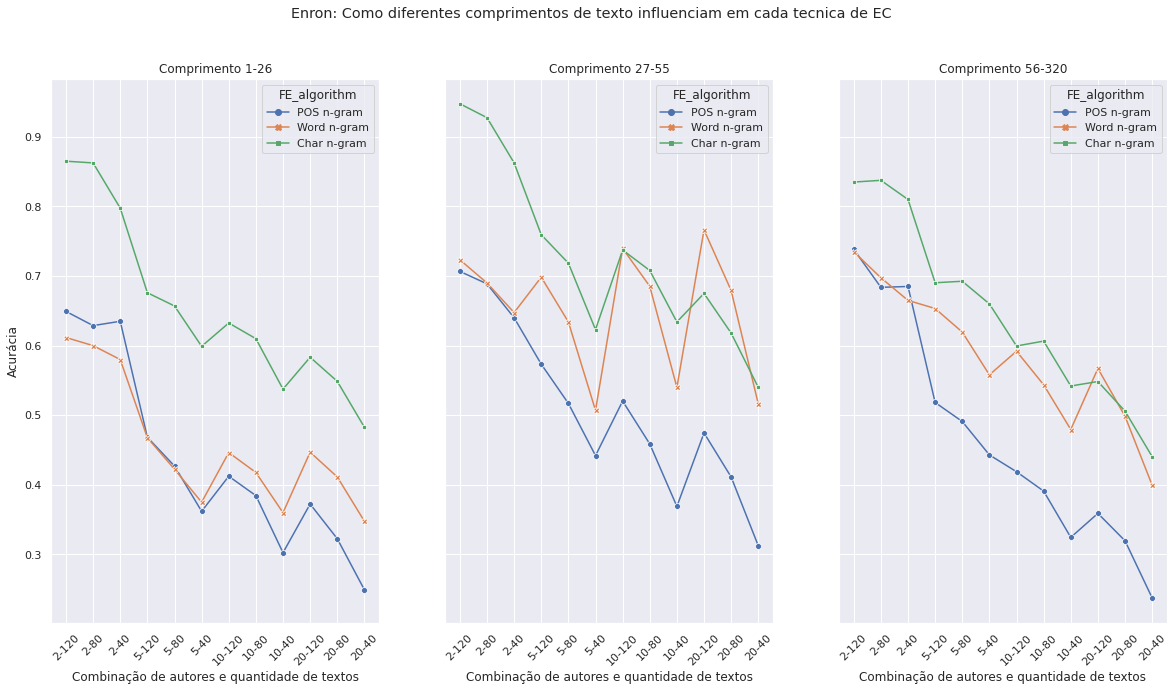

In [36]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)

enron_e2_n5 = enron_e2#[enron_e2.n_gram == 5]

d1 = sns.lineplot(data=enron_e2_n5[enron_e2_n5.doc_len == "1-26"], x="label", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0], style="FE_algorithm", markers=True, dashes=False)
d1.set_xticklabels(d1.get_xticklabels(), rotation=45);
d1.set_ylabel("Acurácia")

d2 = sns.lineplot(data=enron_e2_n5[enron_e2_n5.doc_len == "27-55"], x="label", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1], style="FE_algorithm", markers=True, dashes=False)
d2.set_xticklabels(d2.get_xticklabels(), rotation=45);

d3 = sns.lineplot(data=enron_e2_n5[enron_e2_n5.doc_len == "56-320"], x="label", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[2], style="FE_algorithm", markers=True, dashes=False)
# d3.set_xticklabels(d3.get_xticklabels(), rotation=45)

d1.set_title("Comprimento 1-26"); d2.set_title("Comprimento 27-55"); d3.set_title("Comprimento 56-320")
d1.set_xlabel("Combinação de autores e quantidade de textos"); d2.set_xlabel("Combinação de autores e quantidade de textos"); d3.set_xlabel("Combinação de autores e quantidade de textos")
plt.xticks(rotation=45)
fig.suptitle("Enron: Como diferentes comprimentos de texto influenciam em cada tecnica de EC");


In [29]:
twitter_e2 = pd.read_csv("../../results/twitter_exp2-2.csv")
twitter_e2["label"] = twitter_e2["n_authors"].astype(str) + '-' + twitter_e2["n_samples"].astype(str)
twitter_e2["FE_algorithm_ngram"] = twitter_e2["FE_algorithm"].astype(str) + ' ' + twitter_e2["n_gram"].astype(str)
twitter_e2

,accuracies,n_authors,n_samples,FE_algorithm,n_gram,doc_len,label,FE_algorithm_ngram
0,1.000000,2,10,POS n-gram,1,1-46,2-10,POS n-gram 1
1,0.950000,2,20,POS n-gram,1,1-46,2-20,POS n-gram 1
2,0.983333,2,30,POS n-gram,1,1-46,2-30,POS n-gram 1
3,1.000000,2,50,POS n-gram,1,1-46,2-50,POS n-gram 1
4,1.000000,2,100,POS n-gram,1,1-46,2-100,POS n-gram 1
...,...,...,...,...,...,...,...,...
17635,0.686000,50,50,Char n-gram,5,94-140,50-50,Char n-gram 5
17636,0.762800,50,100,Char n-gram,5,94-140,50-100,Char n-gram 5
17637,0.836700,50,200,Char n-gram,5,94-140,50-200,Char n-gram 5
17638,0.874800,50,300,Char n-gram,5,94-140,50-300,Char n-gram 5


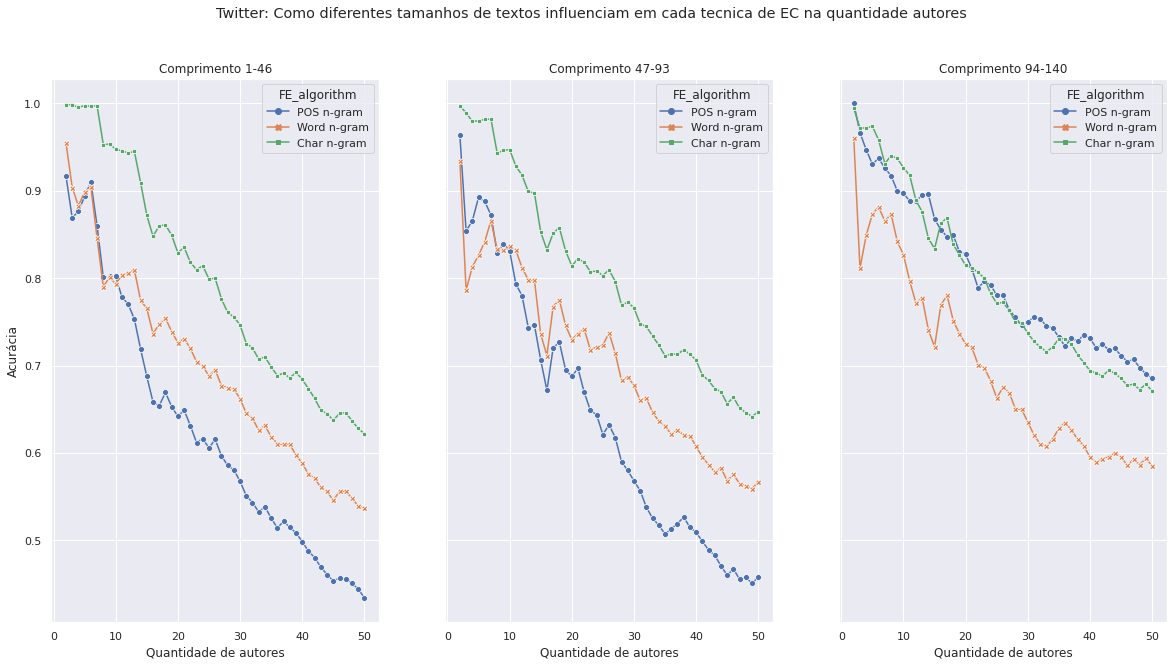

In [22]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)


d1 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "1-46"], x="n_authors", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0], style="FE_algorithm", markers=True, dashes=False)

d2 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "47-93"], x="n_authors", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1], style="FE_algorithm", markers=True, dashes=False)

d3 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "94-140"], x="n_authors", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[2], style="FE_algorithm", markers=True, dashes=False)

d1.set_ylabel("Acurácia")
d1.set_title("Comprimento 1-46"); d2.set_title("Comprimento 47-93"); d3.set_title("Comprimento 94-140")
d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de autores"); d3.set_xlabel("Quantidade de autores")

fig.suptitle("Twitter: Como diferentes tamanhos de textos influenciam em cada tecnica de EC na quantidade autores");

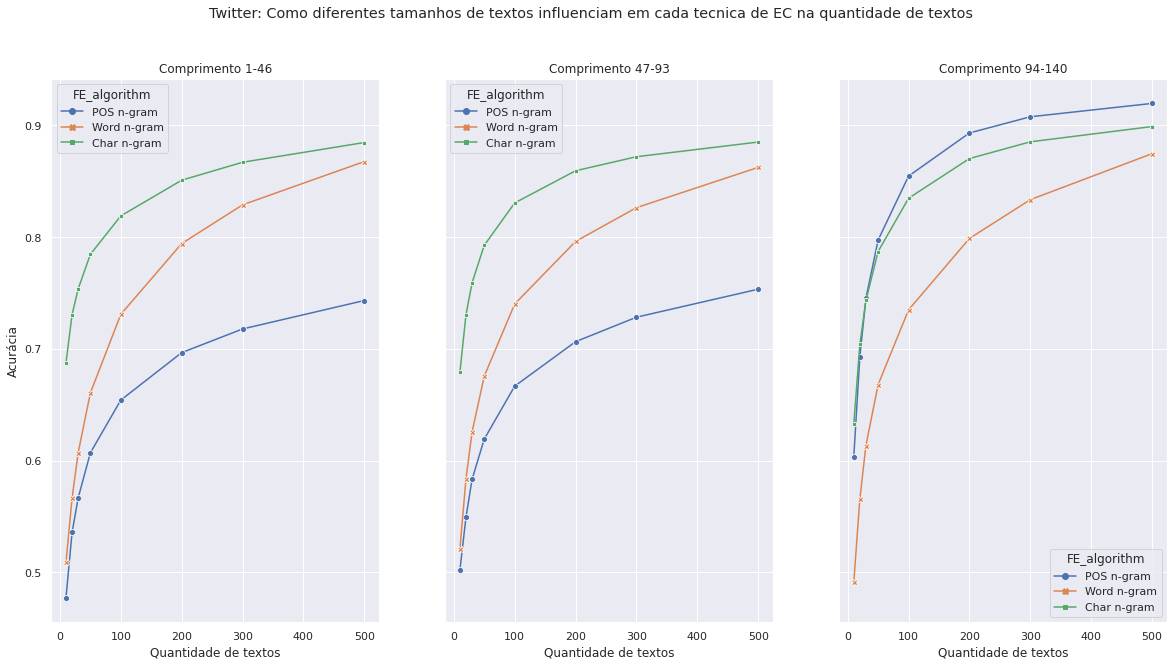

In [37]:
fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)


d1 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "1-46"], x="n_samples", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0], style="FE_algorithm", markers=True, dashes=False)
d2 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "47-93"], x="n_samples", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1], style="FE_algorithm", markers=True, dashes=False)
d3 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "94-140"], x="n_samples", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[2], style="FE_algorithm", markers=True, dashes=False)
d1.set_ylabel("Acurácia")

d1.set_title("Comprimento 1-46"); d2.set_title("Comprimento 47-93"); d3.set_title("Comprimento 94-140")
d1.set_xlabel("Quantidade de textos"); d2.set_xlabel("Quantidade de textos"); d3.set_xlabel("Quantidade de textos")

fig.suptitle("Twitter: Como diferentes tamanhos de textos influenciam em cada tecnica de EC na quantidade de textos");

In [41]:
# fig, ax = plt.subplots(1,3, figsize=(20,10), sharex=True, sharey=True)


# d1 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "1-46"], x="n_gram", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[0], style="FE_algorithm", markers=True, dashes=False)

# d2 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "47-93"], x="n_gram", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[1], style="FE_algorithm", markers=True, dashes=False)

# d3 = sns.lineplot(data=twitter_e2[twitter_e2.doc_len == "94-140"], x="n_gram", y="accuracies", hue="FE_algorithm", ci=None, ax=ax[2], style="FE_algorithm", markers=True, dashes=False)


# d1.set_title("Comprimento 1-46"); d2.set_title("Comprimento 47-93"); d3.set_title("Comprimento 94-140")
# d1.set_xlabel("Quantidade de autores"); d2.set_xlabel("Quantidade de autores"); d3.set_xlabel("Quantidade de autores")
# d1.set_ylabel("Acurácia")
# fig.suptitle("Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de EC na quantidade autores");

Text(0.5, 0.98, 'Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores')

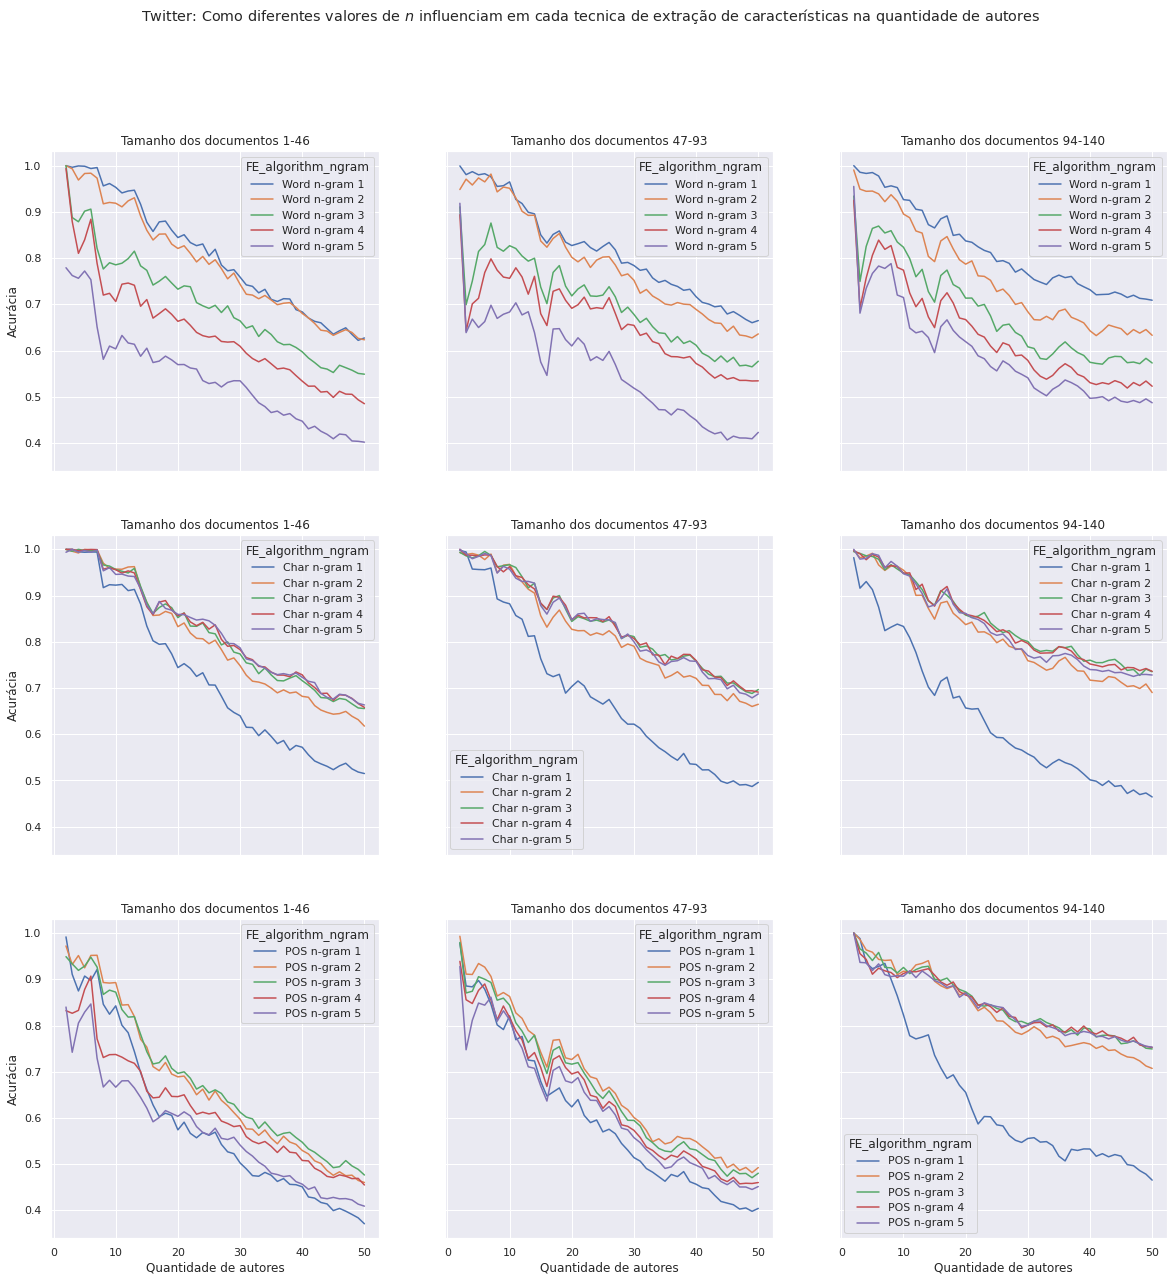

In [31]:
fig, ax = plt.subplots(3,3, figsize=(20,20), sharex=True, sharey=True)
ng1 = twitter_e2[twitter_e2.FE_algorithm == "Word n-gram"]
ng2 = twitter_e2[twitter_e2.FE_algorithm == "Char n-gram"]
ng3 = twitter_e2[twitter_e2.FE_algorithm == "POS n-gram"]


d1 = sns.lineplot(data=ng1[ng1.doc_len == "1-46"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[0,0])
d2 = sns.lineplot(data=ng2[ng2.doc_len == "1-46"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[1,0])
d3 = sns.lineplot(data=ng3[ng3.doc_len == "1-46"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[2,0])

d4 = sns.lineplot(data=ng1[ng1.doc_len == "47-93"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[0,1])
d5 = sns.lineplot(data=ng2[ng2.doc_len == "47-93"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[1,1])
d6 = sns.lineplot(data=ng3[ng3.doc_len == "47-93"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[2,1])

d7 = sns.lineplot(data=ng1[ng1.doc_len == "94-140"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[0,2])
d8 = sns.lineplot(data=ng2[ng2.doc_len == "94-140"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[1,2])
d9 = sns.lineplot(data=ng3[ng3.doc_len == "94-140"], x="n_authors", y="accuracies", hue="FE_algorithm_ngram", ci=None, ax=ax[2,2])


d1.set_title("Tamanho dos documentos 1-46"); d2.set_title("Tamanho dos documentos 1-46"); d3.set_title("Tamanho dos documentos 1-46")
d4.set_title("Tamanho dos documentos 47-93"); d5.set_title("Tamanho dos documentos 47-93"); d6.set_title("Tamanho dos documentos 47-93")
d7.set_title("Tamanho dos documentos 94-140"); d8.set_title("Tamanho dos documentos 94-140"); d9.set_title("Tamanho dos documentos 94-140")

d3.set_xlabel("Quantidade de autores"); d6.set_xlabel("Quantidade de autores"); d9.set_xlabel("Quantidade de autores")
d1.set_ylabel("Acurácia"); d2.set_ylabel("Acurácia"); d3.set_ylabel("Acurácia");
fig.suptitle("Twitter: Como diferentes valores de $n$ influenciam em cada tecnica de extração de características na quantidade de autores")